### Import

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

import sys
sys.path.append('../scripts')

from preprocessing import clear_missing_data, delete_columnns_treshold, non_useful_columns, clear_missing_line, get_numerical, get_categorical, removal_of_duplicates
from pretraitement import imputation_of_categorical_val, imputation_of_numerical_val, onehotencoder
from training import determine_clusters, train_kmeans,predict_data

## Collecte de données

### Chargement du dataset

In [2]:
# Je charge le dataset en ne prenant que les 100 premières lignes afin de tester les fonctions
path = "../data/dataset_10000.csv" # Chemin du dataset 
df = pd.read_csv(path, nrows=10000, sep=',',encoding="utf-8")

C:\Users\Theo\AppData\Local\Temp\ipykernel_21420\812755785.py:3: DtypeWarning: Columns (12,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, nrows=10000, sep=',',encoding="utf-8")


### Préparation des données

##### Nettoyage des colonnes

In [4]:
# Suppressions des colonnes avec 100% données manquantes
df = clear_missing_data(df)

Nombre de colonnes vides (100% de valeurs manquantes) : 58


In [5]:
# Suppressions des colonnes avec 70% données manquantes
df = delete_columnns_treshold(df)

Les colonnes supprimées sont : Index(['alpha-linolenic-acid_100g', 'lactose_100g', 'beta-carotene_100g',
       'sucrose_100g', 'chloride_100g', 'chlorophyl_100g',
       'carbon-footprint_100g', 'omega-6-fat_100g', 'arachidic-acid_100g',
       'energy-from-fat_100g', 'starch_100g', 'omega-3-fat_100g', 'cocoa_100g',
       'folates_100g', 'molybdenum_100g', 'chromium_100g',
       'abbreviated_product_name', 'fruits-vegetables-nuts-dried_100g',
       'fruits-vegetables-nuts-estimate_100g', 'caffeine_100g',
       'fruits-vegetables-nuts_100g', 'vitamin-k_100g', 'iodine_100g',
       'biotin_100g', 'selenium_100g',
       'carbon-footprint-from-meat-or-fish_100g', 'polyols_100g',
       'vitamin-b12_100g', 'vitamin-b9_100g', 'pantothenic-acid_100g',
       'copper_100g', 'vitamin-e_100g', 'manganese_100g', 'packaging_text',
       'zinc_100g', 'phosphorus_100g', 'first_packaging_code_geo',
       'vitamin-b6_100g', 'cities_tags', 'magnesium_100g', 'vitamin-pp_100g',
       'alcohol_10

In [6]:
# Suppressions des colonnes non pertinentes
df = non_useful_columns(df)



Les colonnes supprimées sont : ['Unnamed: 0', 'url', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'last_modified_by', 'last_updated_t', 'brands_tags', 'last_updated_datetime', 'countries_tags', 'countries_en', 'states_tags', 'states_en', 'image_url', 'image_small_url', 'image_nutrition_url', 'image_nutrition_small_url', 'last_image_datetime']


##### Nettoyage des lignes

In [7]:
# Suppressions des lignes vides

df = clear_missing_line(df)

Nombre de lignes vides (100% de valeurs manquantes) : 0


#### Supression des doublons

In [8]:
# Netoyage des doublons
df = removal_of_duplicates(df)

### Imputation des données

In [9]:
df_num = df.select_dtypes(include=['number'])  # Garder uniquement les colonnes numériques
df_cat = df.select_dtypes(exclude=['number'])  # Garder uniquement les colonnes catégorielles



In [10]:
# Imputation des valeurs manquantes pour les colonnes numériques
df_num = imputation_of_numerical_val(df_num) 

In [11]:
# Imputation des valeurs manquantes pour les colonnes catégorielles
df_cat = imputation_of_categorical_val(df_cat)

In [12]:
# Assurer que df_num et df_cat ont les mêmes index que df
df[df_num.columns] = df_num
df[df_cat.columns] = df_cat


In [13]:
df

,code,creator,product_name,quantity,brands,categories,categories_tags,categories_en,labels,labels_tags,...,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
0,54,kiliweb,Limonade artisanale a la rose,1pcs,Spartan,"Snacks, Sweet snacks, Confectioneries","en:beverages-and-beverages-preparations,en:bev...","Beverages and beverages preparations,Beverages",Senza glutine,en:no-gluten,...,254.468,1064.4,8.432000,1.170000,17.714000,5.980000,5.848000,27.790000,0.911000,0.364400
1,63,kiliweb,Mozzarella Schnittfest Gerieben 45% Fett,1pcs,Gut & Gunstig,"Snacks, Sweet snacks, Confectioneries","en:beverages-and-beverages-preparations,en:bev...","Beverages and beverages preparations,Beverages",Senza glutine,en:no-gluten,...,332.000,1389.0,25.000000,17.300000,3.000000,1.000000,5.817167,23.000000,1.200000,0.480000
2,114,kiliweb,Chocolate n 3,80 g,Jeff de Bruges,"Snacks, Sweet snacks, Confectioneries","en:beverages-and-beverages-preparations,en:bev...","Beverages and beverages preparations,Beverages","Point Vert, Fabriqué en France","en:green-dot,en:made-in-france",...,581.600,2415.0,44.000000,28.000000,30.000000,27.000000,10.292500,7.100000,0.025000,0.010000
3,1,inf,Poulet fermier,300g,nortembio,Tè verde,"en:beverages-and-beverages-preparations,en:pla...","Beverages and beverages preparations,Plant-bas...","No gluten, Organic, Vegetarian, EU Organic, Ko...","en:no-gluten,en:organic,en:vegetarian,en:eu-or...",...,262.668,1098.8,5.952000,1.170000,13.914000,5.980000,5.848000,39.470000,0.911000,0.364400
4,105,kiliweb,Paleta gran reserva - Sierra nevada-,750ml,AdvoCare,"Bebidas y preparaciones de bebidas, Bebidas","en:beverages-and-beverages-preparations,en:bev...","Beverages and beverages preparations,Beverages",Senza glutine,en:no-gluten,...,316.800,1325.4,5.752000,1.312500,14.918000,3.500000,19.488000,39.586000,0.860400,0.344200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15608,openfoodfacts-contributors,IsaLean Shake,1pcs,Gerber,"Snacks, Sweet snacks, Confectioneries","en:beverages-and-beverages-preparations,en:bev...","Beverages and beverages preparations,Beverages",Senza glutine,en:no-gluten,...,215.400,901.2,15.961905,1.620952,22.200606,5.620952,4.845281,32.279394,1.087134,0.434854
9996,15609,foodvisor,Thé vert Matcha Japonais Bio,1pcs,NaturaleBio,"Snacks, Sweet snacks, Confectioneries","en:beverages-and-beverages-preparations,en:bev...","Beverages and beverages preparations,Beverages",Senza glutine,en:no-gluten,...,374.000,1565.0,5.300000,0.300000,40.000000,8.000000,9.407407,30.000000,0.787531,0.315012
9997,15611,kiliweb,Avena crunchy,1pcs,Hacendado,"Alimentos y bebidas de origen vegetal, Aliment...","en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo...",en:high-fibres,"en:source-of-fibre,en:high-fibres",...,390.000,1632.0,5.800000,1.000000,66.000000,4.600000,11.000000,13.000000,0.200000,0.080000
9998,1561477671,kiliweb,Valériane stress someil,1pcs,Spartan,"Snacks, Sweet snacks, Confectioneries","en:beverages-and-beverages-preparations,en:bev...","Beverages and beverages preparations,Beverages",Senza glutine,en:no-gluten,...,213.600,893.4,10.026000,3.720000,21.656000,7.596000,4.862000,7.382000,2.336500,0.934800


### Pretraitement

In [14]:
#Encodage des variables catégorielles
df = onehotencoder(df)

### Entrainement 

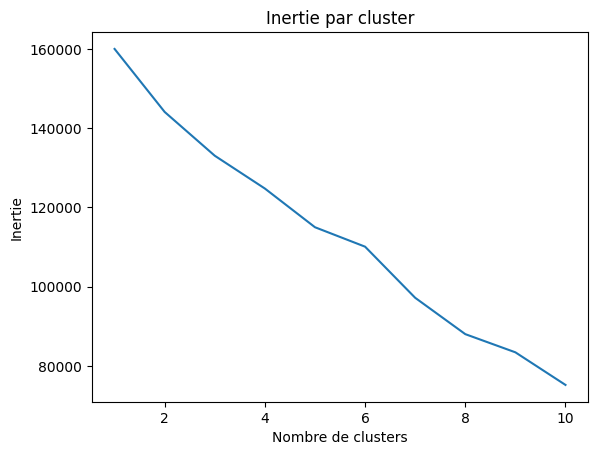

<module 'matplotlib.pyplot' from 'C:\\Users\\Theo\\PycharmProjects\\ML_Groupe\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [15]:
# Normalisation des données (important pour K-Means)
from sklearn.discriminant_analysis import StandardScaler



# Normaliser les colonnes numériques uniquement
scaler = StandardScaler()
df_num_scaled = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)

# Réassembler les données
df_scaled = pd.concat([df_num_scaled, df_cat], axis=1)

# Affichage de l'inertie pour visualiser le nombre de cluster optimal 
determine_clusters(df_num_scaled)



In [16]:
# Entraîner le modèle avec un nombre de clusters determiné ci-dessus
model = train_kmeans(df_num, nb_clusters=6)

In [17]:
predictions = predict_data(model, df_num)

In [18]:
# Ajouter les prédictions au DataFrame
df_num['Cluster'] = predictions

# Afficher les premières lignes du DataFrame avec les clusters
print(df_num.head())


   code  serving_quantity  product_quantity  unique_scans_n  completeness  \
0    54             126.2             296.0             1.4        0.1625   
1    63              42.2             296.0             1.0        0.4625   
2   114              41.6              80.0             1.0        0.4750   
3     1             126.2             300.0             1.0        0.8875   
4   105               5.0             750.0             1.0        0.6750   

   last_image_t  energy-kcal_100g  energy_100g  fat_100g  saturated-fat_100g  \
0  1.733085e+09           254.468       1064.4     8.432              1.1700   
1  1.739903e+09           332.000       1389.0    25.000             17.3000   
2  1.737248e+09           581.600       2415.0    44.000             28.0000   
3  1.741987e+09           262.668       1098.8     5.952              1.1700   
4  1.738074e+09           316.800       1325.4     5.752              1.3125   

   carbohydrates_100g  sugars_100g  fiber_100g  proteins

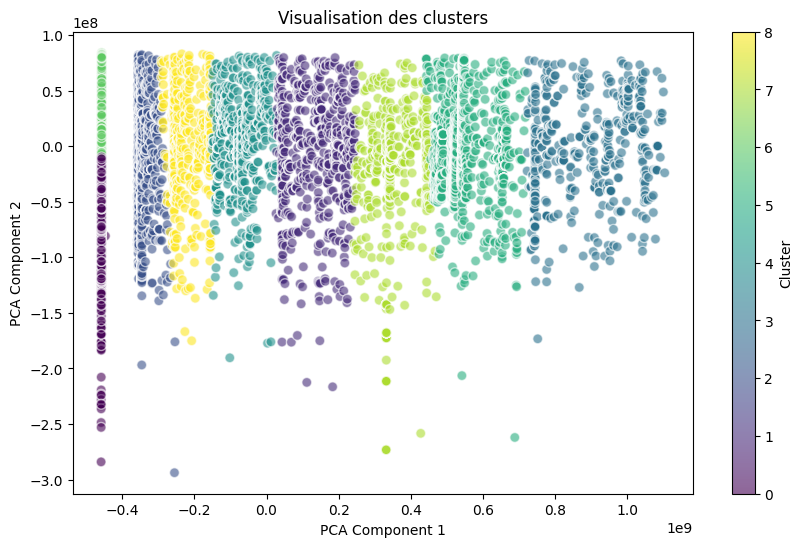

In [19]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Réduire les dimensions à 2 pour la visualisation
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_num.drop(columns=['Cluster']))

# Visualiser les clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=predictions, cmap='viridis', alpha=0.6, edgecolors='w', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Visualisation des clusters')
plt.colorbar(label='Cluster')
plt.show()


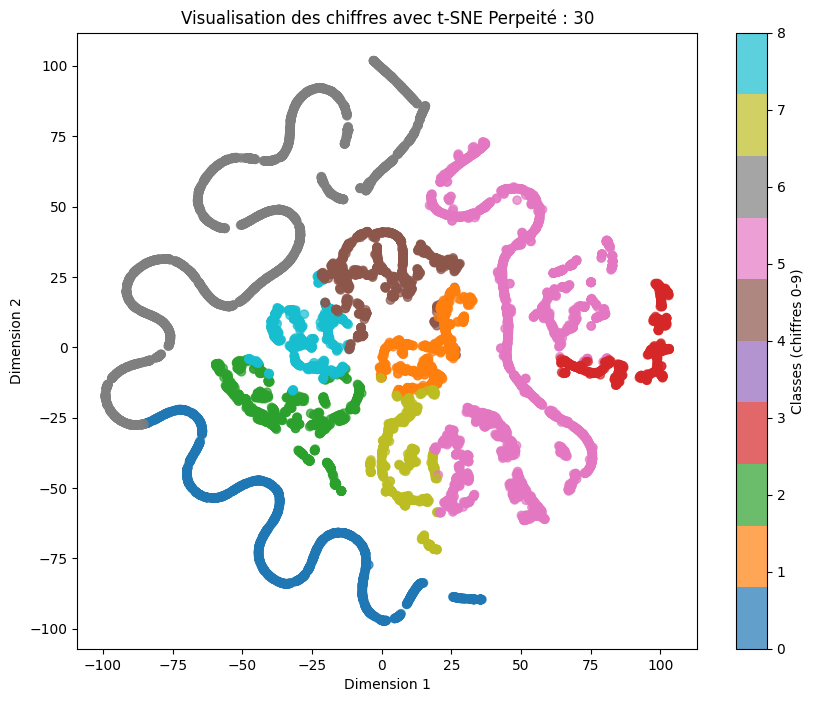

In [20]:
# Réduction à 2 dimensions
pca = PCA(n_components=2)  
df_pca = pca.fit_transform(df_num.drop(columns=['Cluster']))

# Application de t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42) # On peut modifier la perplexity pour modifier les clusters générés
X_tsne = tsne.fit_transform(df_pca)

# Visualisation des résultats
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=predictions, cmap="tab10", alpha=0.7)
plt.colorbar(scatter, label="Classes (chiffres 0-9)")
plt.title("Visualisation des chiffres avec t-SNE Perpeité : 30")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()
#

In [21]:
# Taille des clusters
cluster_sizes = df_num['Cluster'].value_counts()
print("Taille des clusters :")
print(cluster_sizes)

# Statistiques descriptives par cluster
cluster_stats = df_num.groupby('Cluster').mean()
print("Statistiques descriptives par cluster :")
print(cluster_stats)


Taille des clusters :
Cluster
5    2491
6    2263
0    1323
2     831
4     822
1     642
7     562
8     559
3     507
Name: count, dtype: int64
Statistiques descriptives par cluster :
                 code  serving_quantity  product_quantity  unique_scans_n  \
Cluster                                                                     
0        1.525748e+04        128.835951        473.883353        1.388511   
1        5.893313e+08         81.772609        345.940183        1.228972   
2        1.170681e+08        129.704809        409.681505        1.146089   
3        1.337532e+09        175.842132        578.009644        1.160158   
4        3.806317e+08         92.794282        396.408382        1.252068   
5        1.012080e+09         89.315896        387.900810        1.217985   
6        4.563590e+03        133.862784        448.771545        1.457446   
7        8.106553e+08         91.623579        316.677753        1.108541   
8        2.324372e+08        144.489893     

In [22]:
from visualize import word_cloud_for_cluster


word_cloud_for_cluster(df_cat, cluster_number=3, predictions=predictions) 
# Afficher le nuage de mots pour le cluster 

Dossier créé : ../../image/clusters
Image sauvegardée : ../../image/clusters/wordcloud_cluster_3_creator.png
Image sauvegardée : ../../image/clusters/wordcloud_cluster_3_product_name.png
Image sauvegardée : ../../image/clusters/wordcloud_cluster_3_quantity.png
Image sauvegardée : ../../image/clusters/wordcloud_cluster_3_brands.png
Image sauvegardée : ../../image/clusters/wordcloud_cluster_3_categories.png
Image sauvegardée : ../../image/clusters/wordcloud_cluster_3_categories_tags.png
Image sauvegardée : ../../image/clusters/wordcloud_cluster_3_categories_en.png
Image sauvegardée : ../../image/clusters/wordcloud_cluster_3_labels.png
Image sauvegardée : ../../image/clusters/wordcloud_cluster_3_labels_tags.png
Image sauvegardée : ../../image/clusters/wordcloud_cluster_3_labels_en.png
Image sauvegardée : ../../image/clusters/wordcloud_cluster_3_countries.png
Image sauvegardée : ../../image/clusters/wordcloud_cluster_3_serving_size.png
Image sauvegardée : ../../image/clusters/wordcloud_clu